Upload data to sqlite tables.

In [2]:
import pandas as pd
import numpy as np
import sqlite3 as sql
from librosa import feature as ft
from IPython import display as dis
from librosa import core

from matplotlib import pyplot as plt

%matplotlib inline

In [5]:
x_y = pd.read_pickle("dataset/x_y.pkl")

In [6]:
x_y

,sigs,emotion
file_name,,
Ses01F_script01_1_F000,"[[-0.00154565], [-0.00232982], [-0.00185985], ...",Frustration
Ses01F_script01_1_F002,"[[0.00105559], [0.00139954], [0.00106059], [0....",Surprise
Ses01F_script01_1_F003,"[[0.00162135], [0.00178239], [0.000894559], [0...",Surprise
Ses01F_script01_1_F005,"[[0.00254852], [0.00376644], [0.00339257], [0....",Neutral state
Ses01F_script01_1_F006,"[[0.00285482], [0.00479193], [0.00386586], [0....",Neutral state
Ses01F_script01_1_F007,"[[0.00187134], [0.00314571], [0.00163029], [0....",Surprise
Ses01F_script01_1_F008,"[[0.00826302], [0.0147048], [0.0115499], [0.00...",Surprise
Ses01F_script01_1_F009,"[[-0.00121218], [-0.00212365], [-0.00153134], ...",Frustration
Ses01F_script01_1_F010,"[[-0.00103264], [-0.00278232], [-0.00391717], ...",Frustration


In [42]:
x_y_grp = x_y.groupby(by='emotion')
x_y_first = x_y_grp.head(1).copy()
x_y_first["spectral_bw"] = None
x_y_first

,sigs,emotion,spectral_bw
file_name,,,
Ses01F_script01_1_F000,"[[-0.00154565], [-0.00232982], [-0.00185985], ...",Frustration,None
Ses01F_script01_1_F002,"[[0.00105559], [0.00139954], [0.00106059], [0....",Surprise,None
Ses01F_script01_1_F005,"[[0.00254852], [0.00376644], [0.00339257], [0....",Neutral state,None
Ses01F_script01_1_F038,"[[0.011921], [0.0170214], [0.0150357], [0.0160...",Anger,None
Ses01F_script01_1_M006,"[[3.62701e-05], [0.00127638], [0.000834653], [...",Sadness,None
Ses01F_script01_2_F013,"[[0.037966], [0.0362112], [-0.00357923], [-0.0...",Excited,None
Ses01F_script01_3_F010,"[[-0.00232578], [-0.00357799], [-0.00077987], ...",Happiness,None


In [58]:
x_y_last = x_y_grp.tail(7).copy()
x_y_last["spectral_bw"] = None
x_y_last

,sigs,emotion,spectral_bw
file_name,,,
Ses01F_script01_1_F000,"[[-0.00154565], [-0.00232982], [-0.00185985], ...",Frustration,None
Ses01F_script01_1_F002,"[[0.00105559], [0.00139954], [0.00106059], [0....",Surprise,None
Ses01F_script01_1_F003,"[[0.00162135], [0.00178239], [0.000894559], [0...",Surprise,None
Ses01F_script01_1_F005,"[[0.00254852], [0.00376644], [0.00339257], [0....",Neutral state,None
Ses01F_script01_1_F006,"[[0.00285482], [0.00479193], [0.00386586], [0....",Neutral state,None
Ses01F_script01_1_F007,"[[0.00187134], [0.00314571], [0.00163029], [0....",Surprise,None
Ses01F_script01_1_F008,"[[0.00826302], [0.0147048], [0.0115499], [0.00...",Surprise,None
Ses01F_script01_1_F009,"[[-0.00121218], [-0.00212365], [-0.00153134], ...",Frustration,None
Ses01F_script01_1_F010,"[[-0.00103264], [-0.00278232], [-0.00391717], ...",Frustration,None


In [44]:
def spectral_bw(sig, rate = 8000):
    print(sig.shape)
    spec_bw_1 = ft.spectral_bandwidth(y=sig, sr = rate, p=1)
    print(spec_bw_1.shape)
    spec_bw_2 = ft.spectral_bandwidth(y=sig, sr = rate, p=2)
    print(spec_bw_2.shape)
    return(spec_bw_2)


In [45]:
for index, series in x_y_first.iterrows():
    series.spectral_bw = spectral_bw(series.sigs.ravel())
    

(93498,)
(1, 183)
(1, 183)
(93498,)
(1, 183)
(1, 183)
(93498,)
(1, 183)
(1, 183)
(93498,)
(1, 183)
(1, 183)
(93498,)
(1, 183)
(1, 183)
(93498,)
(1, 183)
(1, 183)
(93498,)
(1, 183)
(1, 183)


In [59]:
for index, series in x_y_last.iterrows():
    series.spectral_bw = spectral_bw(series.sigs.ravel())

(93498,)
(1, 183)
(1, 183)
(93498,)
(1, 183)
(1, 183)
(93498,)
(1, 183)
(1, 183)
(93498,)
(1, 183)
(1, 183)
(93498,)
(1, 183)
(1, 183)
(93498,)
(1, 183)
(1, 183)
(93498,)
(1, 183)
(1, 183)
(93498,)
(1, 183)
(1, 183)
(93498,)
(1, 183)
(1, 183)
(93498,)
(1, 183)
(1, 183)
(93498,)
(1, 183)
(1, 183)
(93498,)
(1, 183)
(1, 183)
(93498,)
(1, 183)
(1, 183)
(93498,)
(1, 183)
(1, 183)
(93498,)
(1, 183)
(1, 183)
(93498,)
(1, 183)
(1, 183)
(93498,)
(1, 183)
(1, 183)
(93498,)
(1, 183)
(1, 183)
(93498,)
(1, 183)
(1, 183)
(93498,)
(1, 183)
(1, 183)
(93498,)
(1, 183)
(1, 183)
(93498,)
(1, 183)
(1, 183)
(93498,)
(1, 183)
(1, 183)
(93498,)
(1, 183)
(1, 183)
(93498,)
(1, 183)
(1, 183)
(93498,)
(1, 183)
(1, 183)
(93498,)
(1, 183)
(1, 183)
(93498,)
(1, 183)
(1, 183)
(93498,)
(1, 183)
(1, 183)
(93498,)
(1, 183)
(1, 183)
(93498,)
(1, 183)
(1, 183)
(93498,)
(1, 183)
(1, 183)
(93498,)
(1, 183)
(1, 183)
(93498,)
(1, 183)
(1, 183)
(93498,)
(1, 183)
(1, 183)
(93498,)
(1, 183)
(1, 183)
(93498,)
(1, 183)
(1, 183)
(

In [47]:
x_y_first

,sigs,emotion,spectral_bw
file_name,,,
Ses01F_script01_1_F000,"[[-0.00154565], [-0.00232982], [-0.00185985], ...",Frustration,"[[1001.45881254, 986.238267126, 969.779610065,..."
Ses01F_script01_1_F002,"[[0.00105559], [0.00139954], [0.00106059], [0....",Surprise,"[[916.352082794, 923.138043189, 920.995299453,..."
Ses01F_script01_1_F005,"[[0.00254852], [0.00376644], [0.00339257], [0....",Neutral state,"[[884.918946018, 893.554716114, 901.514645952,..."
Ses01F_script01_1_F038,"[[0.011921], [0.0170214], [0.0150357], [0.0160...",Anger,"[[972.482817478, 603.03875946, 542.160168347, ..."
Ses01F_script01_1_M006,"[[3.62701e-05], [0.00127638], [0.000834653], [...",Sadness,"[[1005.04743905, 1007.98134274, 1105.46384762,..."
Ses01F_script01_2_F013,"[[0.037966], [0.0362112], [-0.00357923], [-0.0...",Excited,"[[944.158075092, 972.202736821, 981.38747526, ..."
Ses01F_script01_3_F010,"[[-0.00232578], [-0.00357799], [-0.00077987], ...",Happiness,"[[1044.13993171, 983.874309359, 908.78052368, ..."


In [60]:
x_y_last

,sigs,emotion,spectral_bw
file_name,,,
Ses01F_script01_1_F000,"[[-0.00154565], [-0.00232982], [-0.00185985], ...",Frustration,"[[1001.45881254, 986.238267126, 969.779610065,..."
Ses01F_script01_1_F002,"[[0.00105559], [0.00139954], [0.00106059], [0....",Surprise,"[[916.352082794, 923.138043189, 920.995299453,..."
Ses01F_script01_1_F003,"[[0.00162135], [0.00178239], [0.000894559], [0...",Surprise,"[[918.380956056, 899.40610052, 878.872961585, ..."
Ses01F_script01_1_F005,"[[0.00254852], [0.00376644], [0.00339257], [0....",Neutral state,"[[884.918946018, 893.554716114, 901.514645952,..."
Ses01F_script01_1_F006,"[[0.00285482], [0.00479193], [0.00386586], [0....",Neutral state,"[[927.512063182, 905.566976771, 884.589868508,..."
Ses01F_script01_1_F007,"[[0.00187134], [0.00314571], [0.00163029], [0....",Surprise,"[[923.983882354, 902.570780339, 861.79240638, ..."
Ses01F_script01_1_F008,"[[0.00826302], [0.0147048], [0.0115499], [0.00...",Surprise,"[[693.983854839, 727.712793004, 849.894510655,..."
Ses01F_script01_1_F009,"[[-0.00121218], [-0.00212365], [-0.00153134], ...",Frustration,"[[884.365254748, 886.7383852, 873.072811751, 8..."
Ses01F_script01_1_F010,"[[-0.00103264], [-0.00278232], [-0.00391717], ...",Frustration,"[[834.061950037, 804.761958512, 905.374608997,..."


Computes the chroma variant “Chroma Energy Normalized” (CENS)

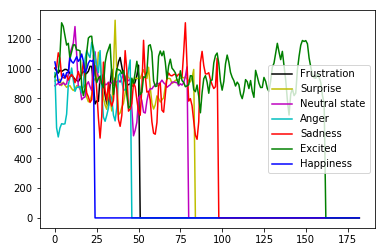

In [67]:
color_codes = ['b','g','r','c','m','y','k']
legend_handles = []

for index, series in x_y_first.iterrows():
    l_h, = plt.plot(series.spectral_bw.ravel(), color_codes.pop(), label = series.emotion )
    legend_handles.append(l_h)
plt.legend(handles=legend_handles)
#x_y_first.spectral_bw[0]

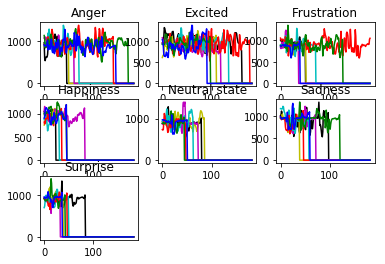

In [78]:
color_codes = ['b','g','r','c','m','y','k']
sub_plots = 1
x_y_last_grp = x_y_last.groupby(by='emotion')
for name, group in x_y_last_grp:
    color_codes = ['b','g','r','c','m','y','k']
    plt.subplot(330+sub_plots)
    sub_plots += 1
    for index, series in group.iterrows():
        l_h, = plt.plot(series.spectral_bw.ravel(), color_codes.pop(), label = series.emotion )
        legend_handles.append(l_h)
    
    plt.title(name)
    #plt.legend(handles=legend_handles)

Compute root-mean-square (RMS) energy for each frame

In [33]:
hand_crafted = []
sigs_diff_length = []
sigs = []
time_steps = []

for i in ("07", "08", "09", "10", "11"):
    (sig,rate) = core.load("dataset/wav/Ses01F_impro01/Ses01F_impro01_F0{}.wav".format(i), sr = 8000)
    
    sigs_diff_length.append(sig)
    time_steps.append(len(sig))
    
time_step = max(time_steps)

for sig in sigs_diff_length:
    sig = np.pad(sig, (0, time_step - len(sig)), mode = "constant")
    sig = np.reshape(sig, (-1,1)) 
    sigs.append(sig)
    
for sig in sigs:
    print(sig.shape)
    print(ft.spectral_bandwidth(y=sig.ravel(), sr = rate, p=1))
    hand_crafted.append(ft.spectral_bandwidth(y=sig.ravel(), sr = rate, p=1).ravel())
    
pd.DataFrame(hand_crafted).to_pickle("hand_crafted.pkl")

    

(78480, 1)
[[ 983.21725138  904.70978601  834.90266799  963.87173008  904.38682689
   712.86012028  561.94561365  574.61827289  624.29452998  679.19041762
   711.44779307  748.70030319  717.82899156  555.90785505  530.50217111
   538.08638829  823.79976067  912.38039568  855.12473117  783.38244531
   683.32245302  710.85944817  807.09854685  816.41893835  789.00001302
   674.73276482  538.10462383  569.31469489  558.26168108  601.75138465
   744.61286343  732.36357429  785.3397195   912.32116311  957.70024243
   876.32599749  817.3844867   957.59162869  994.35953944  919.17817923
   812.66614616  830.02199122  882.53706525  895.97357527  901.7169795
   863.4096014   796.77093088  754.39278488  790.48907523  754.09910748
   614.55036046  640.37374831  705.28392714  778.84503579  693.02815836
   562.95235845  615.15637726  726.21135277  669.12305629  871.65055977
   847.96017168  779.43548089  699.92095844  729.2467254   825.28500887
   795.75642942  802.6327722   745.55779827  653.89495